# <span style="color:darkblue"> QTM 151 - Quiz 2 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your Emory code below

In [54]:
# Write your answer here
print("2550766")

2550766


<font size = "5" >
This quiz is open book 

- You can use the lecture notes and Google
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"

**By printing the message, you acknowledge that you will abide by Emory's code of conduct.**

In [55]:
# Write your answer here:
print("I will abide by Emory's code of conduct")

I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", and "pandas"

In [56]:
# Write your answer here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = "5">

Import the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting

In [57]:
# Write your own code
fifa = pd.read_csv("data_quiz/fifa23_players_basic.csv")
fifa.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low


<font size = "5">

(a) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "overall"
- If "overall < 85", status = "Regular Player"
- If "age_player >= 85", status = "Top Player"
- The function returns "status"

Step 2:
- Extract the column "Overall" in the dataset <br>
(be carefeful to write the "O" capitalized)
- Create a new variable called "top_players" <br>
to assign each player to the correct status

HINT: Use the ".apply()" function

In [58]:
# Write your own code
def fifa_overall(overall):
    if (overall < 85):
        status = "Regular Player"
    else:
        status = "Top Player"
    return(status)

fifa['Overall']
fifa["top_players"] = fifa["Overall"].apply(fifa_overall)

<font size = "5">

(b) Use queries + global variables

<font size = "3">

- Compute the mean of the column "Wage(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 9) <br>
Reference the column as ``` `Wage(in Euro)`    ``` inside .query()

In [59]:
# Write your own code
mean_wage = fifa['Wage(in Euro)'].mean()
threshold = mean_wage
fifa_highwage = fifa.query(" `Wage(in Euro)` > @threshold")
#display(fifa_highwage)

<font size = "5">

(c) Use sorting + ".iloc[]"

<font size = "3">

- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players
- Print their age

In [60]:
# Write your own code
age_sorted = fifa.sort_values(by='Age', ascending=True)
youngest_five = age_sorted.iloc[[0,1,2,3,4]]
print(youngest_five["Age"])


17956    16
18014    16
16084    16
11481    16
17591    16
Name: Age, dtype: int64


<font size = "5">

(d) Create a function with four inputs $f(y,x,b0,b1)$

<font size = "3">

$\qquad e2 = (y - b_0 - b_1 * x)^2$

- The function should return the mean of e2
- This is the mean-square error (mse)
- Call the function "fn_mse"
- Let $y$ be the column "Potential"
- Let $x$ be the column "Age" 
- Does <br>
$\qquad (b_0 = 80, b_1 = 0.4)$ or <br>
$\qquad (b_0 = 80, b_1 =-0.3)$ or <br>
$\qquad (b_0 = 80, b_1 = -0.5)$ <br>
produce the lowest value of mse?
- Print your results

In [67]:
# Write your own code
def fn_mse(y, b0, b1, x):
     e2 = (y - b0 - b1 * x)**2
     return e2.mean()
y = fifa["Potential"]
x = fifa["Age"]

fn1 = fn_mse(y, x, 80, 0.4)
fn2 = fn_mse(y, x, 80, -0.3)
fn3 = fn_mse(y, x, 80, -0.5)
print(fn1)

lowest_mse = min(fn1, fn2, fn3)
if lowest_mse == fn1:
    print(f"The lowest mse is the one with b0=80 and b1=0.4")
elif lowest_mse == fn2:
    print(f"The lowest mse is the one with b0=80 and b1=-0.3")
else:
    print(f"The lowest mse is the one with b0=80 and b1=-0.5")

265.80300987108257


<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Create ``` list_status = [0,1]```
- Create ``` list_prob = [0.5, 0.5]```
- Create a new variable $n$ with the number of rows of the dataset
- Define a random seed that equals 42

- Use 
```python
    np.random.choice(list_status,
                     size = n,
                     p = list_prob)
```
$\qquad$ to create a new column called "status" <br>
$\qquad$ which randomly assigns each row to "0" or "1" <br>
$\qquad$ with equal probability
- Use .query() to subset all observations with status == 0.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with status == 1.<br>
store it in a new dataset called "data1"



In [62]:
# Write your own code
list_status = [0,1]
list_prob = [0.5, 0.5]
n = len(fifa)
np.random.seed(42)
fifa['status'] = np.random.choice(list_status, size=n, p=list_prob)
data0 = fifa.query("status == 0")
data1 = fifa.query("status == 1")


<font size = "5">

(f) Create two overlapping histogram plots

<font size = "3">

- This question requires the two datasets you created in (e)
- Display the distribution of "Age" for "data0" and "data1"
- Use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title

Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

- Provide a short interpretation of the graph using the information from the Note

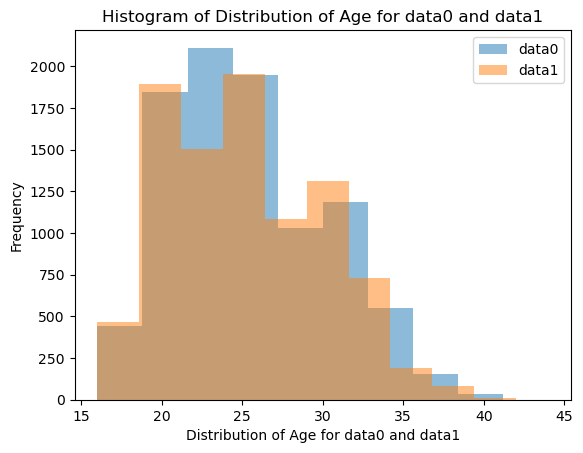

In [63]:
# Write your own code
plt.hist(x = data0['Age'], alpha = 0.5, label='data0')
plt.hist(x = data1['Age'], alpha = 0.5, label='data1')

plt.title("Histogram of Distribution of Age for data0 and data1")
plt.xlabel("Distribution of Age for data0 and data1")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Interpretation: The age distributions for data0 and data1 are similar. This supports our expectation becuase we ransomly assigned each row to data0 or dataq, and ransom assignment should produce similar distributions between the two groups. 